In [1]:
import numpy as np

In [2]:
class Perceptron():
    """Классификатор на основе персептрона.
    Параметры
    ---------
    eta : float
        Скорость обучения (0.0 - 1.0)
    n_iter : int
        Проходы по обучающему набору данных
    random_state : int
        Начальное значение генератора сл. чисел
        для инициализации весов
    Атрибуты
    ---------
    w_ : одномерный список
        Веса после обучения.
    errors_ : список
        Кол-во неправильных классификаций в каждой эпохе.
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Подгон к обуч. данным.
        Параметры
        ---------
        X : list, shape = [n_examples, n_features]
            n_examples - кол-во образцов, n_features - кол-во признаков
        y : list, shape = [n_examples]
            Целевые значения
        Возвращает
        ---------
        self : object
        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Вычисляет общий вход"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Возвращает метку класса после единичного шага"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [3]:
import pandas as pd

df = pd.read_csv('iris.data')

In [4]:
df.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values  # длина чашелистика и лепестка

In [7]:
X[:10]

array([[4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5]])

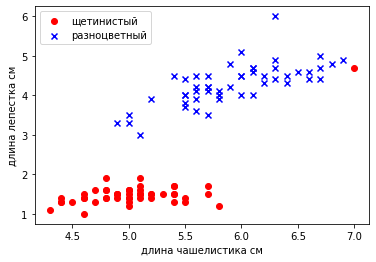

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X[:50, 0], X[:50, 1],
            c='r', marker='o', label='щетинистый')
plt.scatter(X[50:100, 0], X[50:100, 1],
            c='b', marker='x', label='разноцветный')

plt.xlabel('длина чашелистика см')
plt.ylabel('длина лепестка см')
plt.legend(loc='upper left')
plt.show()

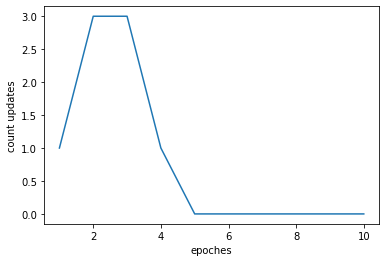

In [9]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1),
         ppn.errors_)
plt.xlabel('epoches')
plt.ylabel('count updates')
plt.show()

In [10]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):
    # настроить генератор маркеров и карту цветов
    markers = ('s', 'x', 'o', '4', '4')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # вывести поверхность решения
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, хх2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), хх2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, хх2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(хх2.min(), хх2.max())
    # вывести образцы по классам
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

C:\Users\zekat\AppData\Local\Temp/ipykernel_15356/2389448159.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


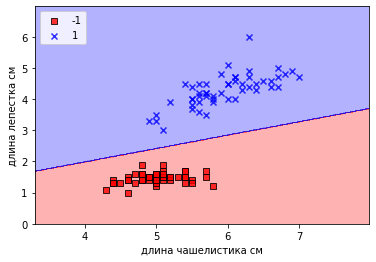

In [11]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('длина чашелистика см')
plt.ylabel('длина лепестка см')
plt.legend(loc='upper left')
plt.show()

# Adaline GD

In [12]:
class AdalineGD():
    """Классификатор на основе персептрона.
    Параметры
    ---------
    eta : float
        Скорость обучения (0.0 - 1.0)
    n_iter : int
        Проходы по обучающему набору данных
    random_state : int
        Начальное значение генератора сл. чисел
        для инициализации весов
    Атрибуты
    ---------
    w_ : одномерный список
        Веса после обучения.
    cost_ : список
        Значение ф-ции активации на основе суммы квадратов.
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Подгон к обуч. данным.
        Параметры
        ---------
        X : list, shape = [n_examples, n_features]
            n_examples - кол-во образцов, n_features - кол-во признаков
        y : list, shape = [n_examples]
            Целевые значения
        Возвращает
        ---------
        self : object
        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (pow(errors, 2).sum() / 2.0)
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Вычисляет общий вход"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Ф-ция активации"""
        return X

    def predict(self, X):
        """Возвращает метку класса после единичного шага"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [13]:
ada1 = AdalineGD(eta=0.01, n_iter=10).fit(X, y)
ada2 = AdalineGD(eta=0.0001, n_iter=10).fit(X, y)

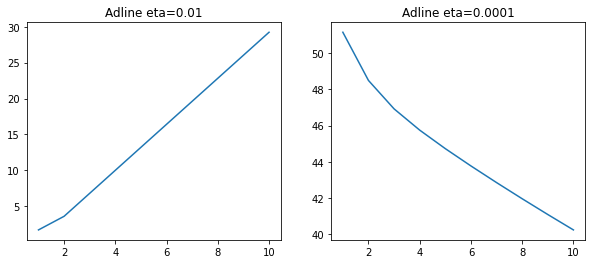

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_))
ax[0].set_title('Adline eta=0.01')

ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_)
ax[1].set_title('Adline eta=0.0001')
plt.show()

In [15]:
ada2.w_

array([ 0.00561614, -0.0208399 ,  0.09555246])

# Scaling

In [16]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [32]:
ada_std = AdalineGD(eta=0.01, n_iter=10).fit(X_std, y)

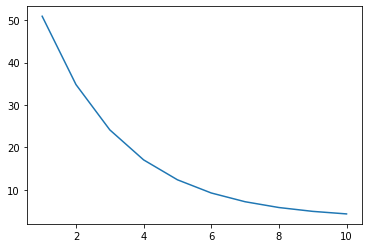

In [33]:
plt.plot(range(1, len(ada_std.cost_) + 1), ada_std.cost_)

C:\Users\zekat\AppData\Local\Temp/ipykernel_15356/2389448159.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


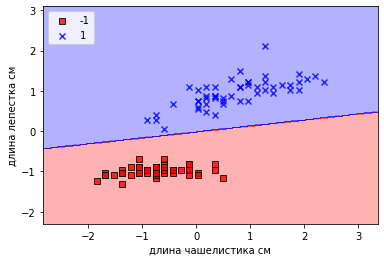

In [34]:
plot_decision_regions(X_std, y, classifier=ada_std)
plt.xlabel('длина чашелистика см')
plt.ylabel('длина лепестка см')
plt.legend(loc='upper left')
plt.show()